# Analyze Consumer Complaint Data

## Description

I am using pandas to read and analyze data from the [CFPB Consumer Complaint
Database](http://www.consumerfinance.gov/complaintdatabase/). This database is
a collection of all complaints made by American consumers to the Consumer
Financial Protection Bureau.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
#reading/pulling data file csv
consumer_complaints = pd.read_csv("Consumer_Complaints.csv", )

/Users/trippshealy/iron_yard/week4/consumer-complaints/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


##Cleaning Data

In [5]:
#removing whitespace from column titles
consumer_complaints = consumer_complaints.rename(columns=lambda x: x.replace(' ', '_'))

In [6]:
consumer_complaints.head()

,Complaint_ID,Product,Sub-product,Issue,Sub-issue,State,ZIP_code,Submitted_via,Date_received,Date_sent_to_company,Company,Company_response,Timely_response?,Consumer_disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [7]:
#making index the date complaint recieved 
consumer_complaints.index = pd.to_datetime(consumer_complaints.pop('Date_received'), format="%m/%d/%Y")

In [8]:
consumer_complaints.head()

,Complaint_ID,Product,Sub-product,Issue,Sub-issue,State,ZIP_code,Submitted_via,Date_sent_to_company,Company,Company_response,Timely_response?,Consumer_disputed?
Date_received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,NaN
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [9]:
#removed complaint_id, issue, sub_issue, Submitted_via, Date_sent_to_company, Consumer_disputed?

consumer_complaints = consumer_complaints[["Product", "Sub-product", "State", "ZIP_code",\
                                           "Company", "Company_response", "Timely_response?"]]

In [10]:
consumer_complaints.head(10)

,Product,Sub-product,State,ZIP_code,Company,Company_response,Timely_response?
Date_received,,,,,,,
2015-05-22,Mortgage,Conventional adjustable mortgage (ARM),VA,22204,"Green Tree Servicing, LLC",Closed with explanation,Yes
2015-05-22,Consumer loan,Vehicle loan,MO,63304,Ally Financial Inc.,In progress,Yes
2015-05-22,Consumer loan,Vehicle lease,FL,33414,Ally Financial Inc.,In progress,Yes
2015-05-22,Mortgage,Conventional fixed mortgage,NC,27615,Navy FCU,In progress,Yes
2015-05-22,Consumer loan,Installment loan,MA,1474,Santander Bank US,In progress,Yes
2015-05-22,Debt collection,Medical,KY,41522,"GLA Collection Company, Inc.",Closed with explanation,Yes
2015-05-22,Debt collection,Medical,IL,62684,Transworld Systems Inc.,In progress,Yes
2015-05-22,Debt collection,"Other (phone, health club, etc.)",DC,20005,"PDQ Services, Inc.",Closed with explanation,Yes
2015-05-21,Debt collection,"Other (phone, health club, etc.)",TX,78233,"I.C. System, Inc.",Closed with explanation,Yes


#Consumer Complaints by Month

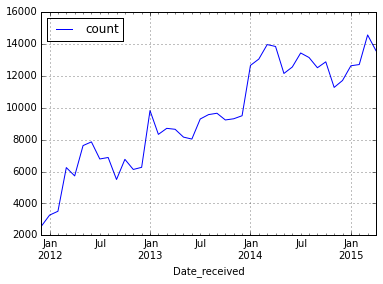

In [11]:
consumer_complaints.Product.resample("M", how=["count"])[:-1].plot()

The number of consumer complaints recoreded continues to grow. 

# Consumer Complaints by Company

consumer_complaints.Product.value_counts().plot('barh', title="Complaints By Product")

In [12]:
complaints_by_company = consumer_complaints.Company.value_counts()

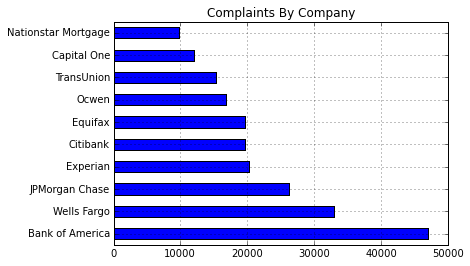

In [13]:
complaints_by_company[:10].plot(kind='barh', title="Complaints By Company")

BOA and WF holds the most complaints but likely also the most companies. We would need to know the total number of customers and compare to number of complaints normalize compaints based on size. 

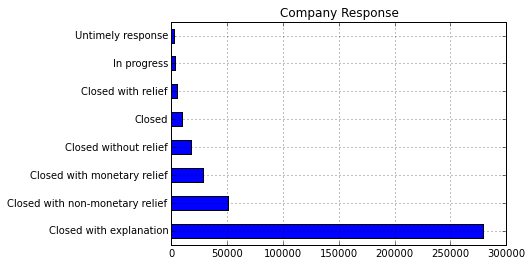

In [14]:
consumer_complaints.Company_response.value_counts().plot(kind='barh', title="Company Response")

#Consumer Complaints By Day of Week

In [15]:
consumer_complaints["day_of_week"] = consumer_complaints.index.to_series().map(lambda d: d.weekday())

In [16]:
consumer_complaints.head()

,Product,Sub-product,State,ZIP_code,Company,Company_response,Timely_response?,day_of_week
Date_received,,,,,,,,
2015-05-22,Mortgage,Conventional adjustable mortgage (ARM),VA,22204,"Green Tree Servicing, LLC",Closed with explanation,Yes,4
2015-05-22,Consumer loan,Vehicle loan,MO,63304,Ally Financial Inc.,In progress,Yes,4
2015-05-22,Consumer loan,Vehicle lease,FL,33414,Ally Financial Inc.,In progress,Yes,4
2015-05-22,Mortgage,Conventional fixed mortgage,NC,27615,Navy FCU,In progress,Yes,4
2015-05-22,Consumer loan,Installment loan,MA,1474,Santander Bank US,In progress,Yes,4


In [17]:
complaints_by_day = consumer_complaints.day_of_week.value_counts().sort_index()

In [18]:
dow = ["M", "Tu", "W", "Th", "F", "Sa", "Su"]

In [19]:
complaints_by_day.index = dow

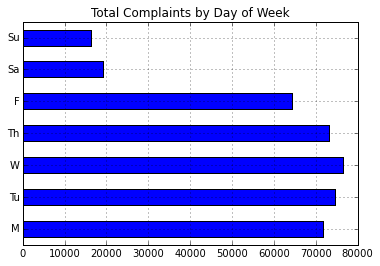

In [20]:
complaints_by_day.plot(kind='barh', title='Total Complaints by Day of Week')

Three times the number of complaints occur during the week compared to Saturday and Sunday. 

In [21]:
avg_complaints_by_day = consumer_complaints.Product.resample("D", how=["count"])

In [22]:
avg_complaints_by_day["day_of_week"] = avg_complaints_by_day.index.to_series().map(lambda d: d.weekday())

In [23]:
avg_w_day_week = avg_complaints_by_day.groupby('day_of_week').mean()

In [24]:
avg_w_day_week.index = dow

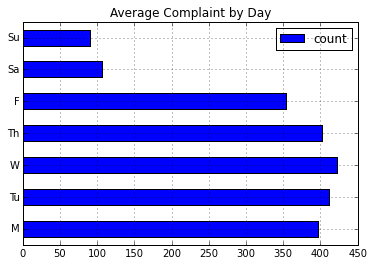

In [25]:
avg_w_day_week.plot(kind='barh', title='Average Complaint by Day')

#Consumer Complaint Data by State

* Combine the complaints data with US population by state data (find this
  yourself) and then chart the frequency of complaints by state per capita.
* Find statistically significant outliers of complaints by ZIP code. Look these
  up to see if there's a possible reason (military bases are often surrounded
  by predatory lending companies, for example.)

##Grouped by State

In [26]:
consumer_complaints[~(consumer_complaints['State'] == 'AA')].shape

(395843, 8)

In [27]:
state_complaints = consumer_complaints.State.value_counts().sort_index()

In [28]:
state_complaints.head()

AA      10
AE     147
AK     478
AL    3842
AP     113
dtype: int64

In [29]:
consumer_complaints.groupby('State').groups.keys()

dict_keys(['GU', 'TX', 'GA', 'KS', 'NY', 'FL', 'MD', 'NM', 'CT', 'AP', 'MN', 'UT', 'WA', 'MT', 'MS', 'MH', 'OH', 'SC', 'AL', 'WV', 'SD', 'FM', 'WY', 'HI', 'VT', 'AR', 'ME', 'AE', 'MP', 'AS', 'LA', 'VA', 'IN', 'AK', 'OK', 'MA', 'DE', 'IA', 'PA', 'KY', 'TN', 'PR', 'CO', 'MO', 'AA', 'IL', 'DC', 'OR', 'VI', 'ID', 'NH', 'NJ', 'NC', 'RI', 'WI', 'ND', 'AZ', 'CA', 'NE', 'NV', 'PW', 'MI'])

In [30]:
state_populations = pd.read_csv('us_pop_state.csv', skiprows=3)

In [31]:
state_pop = state_populations.rename(columns = {'Unnamed: 0':'State'})

In [32]:
state_population = state_pop[5:]

In [33]:
state_population.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014
5,.Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
6,.Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
7,.Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
8,.Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
9,.California,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [34]:
states = state_population.dropna()

In [35]:
states.State = states.State.map(lambda name: name[1:] if name.startswith('.') else name)

/Users/trippshealy/iron_yard/week4/consumer-complaints/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/generic.py:2110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
states.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014
5,Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
6,Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
7,Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
8,Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
9,California,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [37]:
state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [38]:
state_abbr = {value: key for key, value in state_names.items()}

In [39]:
state_abbr

{'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'National': 'NA',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 

In [40]:
states.State = states.State.map(state_abbr)

/Users/trippshealy/iron_yard/week4/consumer-complaints/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/generic.py:2110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [41]:
states.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014
5,AL,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
6,AK,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
7,AZ,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
8,AR,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
9,CA,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [42]:
states.index = states.State

In [43]:
states.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014
State,,,,,,,,
AL,AL,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
AK,AK,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
AZ,AZ,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
AR,AR,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
CA,CA,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [44]:
states_2014 = states['2014']

In [45]:
states_2014.head()

State
AL     4,849,377
AK       736,732
AZ     6,731,484
AR     2,966,369
CA    38,802,500
Name: 2014, dtype: object

In [46]:
states_2014 = states_2014.to_frame(name='population')

In [47]:
states_2014.head()

,population
State,
AL,"4,849,377"
AK,"736,732"
AZ,"6,731,484"
AR,"2,966,369"
CA,"38,802,500"


In [48]:
state_complaints = state_complaints.to_frame(name='complaints')

In [49]:
state_complaints.head()

,complaints
AA,10
AE,147
AK,478
AL,3842
AP,113


In [50]:
state_complaints = state_complaints.join(states_2014)

In [51]:
state_complaints = state_complaints.dropna()

In [52]:
state_complaints.head()

,complaints,population
AK,478,"736,732"
AL,3842,"4,849,377"
AR,1670,"2,966,369"
AZ,8678,"6,731,484"
CA,58603,"38,802,500"


In [53]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

In [54]:
state_complaints.population = state_complaints.population.map(locale.atoi)

In [55]:
state_complaints.head()

,complaints,population
AK,478,736732
AL,3842,4849377
AR,1670,2966369
AZ,8678,6731484
CA,58603,38802500


In [56]:
state_complaints['per_capita'] = state_complaints.complaints / state_complaints.population *10000

In [57]:
state_complaints.head()

,complaints,population,per_capita
AK,478,736732,6.488112
AL,3842,4849377,7.922667
AR,1670,2966369,5.629778
AZ,8678,6731484,12.891660
CA,58603,38802500,15.102893


In [58]:
state_complaints_per_capita = state_complaints['per_capita']

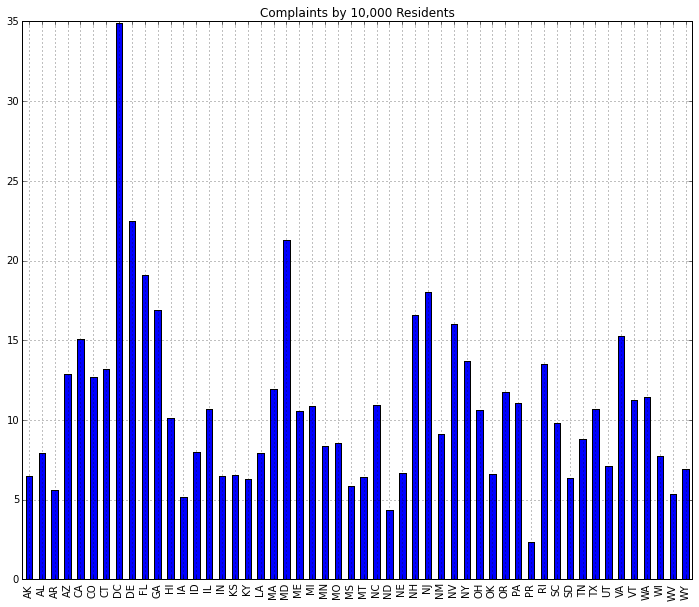

In [59]:
plt.figure(figsize=(12,10))
state_complaints_per_capita.plot(kind='bar', title='Complaints by 10,000 Residents')

In [60]:
complaints_zip = consumer_complaints.ZIP_code.value_counts().sort_index()

In [61]:
zips_complaints = complaints_zip.to_frame(name='complaints')

In [62]:
#finding zipcode with most complaints
zips_complaints[zips_complaints['complaints'] > 915]

,complaints
48382,916


In [63]:
zips = pd.read_csv('2010_zip_pop.csv')

In [64]:
zips = zips.rename(columns=lambda x: x.replace(' ', '_'))

In [65]:
zips = zips.rename(columns=lambda x: x.replace('2010_', ''))

In [66]:
zips.head()

,Zip_Code_ZCTA,Census_Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [67]:
zips.index = zips.Zip_Code_ZCTA

In [68]:
zips = zips['Census_Population']

In [69]:
zips = zips.to_frame(name='population')

In [70]:
zips_complaints = zips_complaints.join(zips)

In [71]:
zips_complaints = zips_complaints.dropna()

In [72]:
zips_complaints.head()

,complaints,population
1001,13,16769
1002,17,29049
1005,4,5079
1007,18,14649
1008,1,1263


In [73]:
zips_complaints.max()

complaints       916
population    113916
dtype: float64

In [75]:
zips_complaints.head()

,complaints,population
1001,13,16769
1002,17,29049
1005,4,5079
1007,18,14649
1008,1,1263


In [76]:
zips_complaints['per_capita'] = (zips_complaints.complaints / zips_complaints.population)*10000

In [77]:
zips_complaints.per_capita.max()

inf

In [78]:
#removes numbers divided by 0
zips_complaints = zips_complaints.replace([np.inf, -np.inf], np.nan).dropna(subset=["per_capita"], how="all")

In [79]:
#getting the wrong output for per_capita - this should be 916/113916*10000 = 80
zips_complaints.max()

complaints       916
population    113916
per_capita     40000
dtype: float64

In [80]:
zips_complaints.xs(99926)

complaints       1.000000
population    1460.000000
per_capita       6.849315
Name: 99926.0, dtype: float64

In [78]:
zips_complaints.head()

,complaints,population,per_capita
1001,13,16769,7.752400
1002,17,29049,5.852181
1005,4,5079,7.875566
1007,18,14649,12.287528
1008,1,1263,7.917656


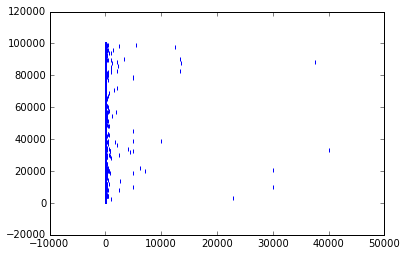

In [83]:
plt.scatter(zips_complaints.per_capita, zips_complaints.index, marker="|")